<a href="https://colab.research.google.com/github/CorralesK/Lab04_EDA/blob/main/lab04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laboratorio 04 - EDA**

In [4]:
# Cargando las librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import skew, kurtosis

## 1. Carga y comprensión inicial de los datos

In [8]:
# Ruta del archivo
filepath = 'https://raw.githubusercontent.com/CorralesK/Lab04_EDA/main/datos.csv' # Me falta que se cargue de git

# Cargar el dataset
df = pd.read_csv(filepath)

In [ ]:
# Verificar el formato de las columnas. Comprobar el tipo de cada
print("Información del dataset:")
df.info()

In [ ]:
# Explorar las primeras filas
print(df.head())

In [ ]:
# Observar la cantidad de filas y columnas
print(f"Dimensiones del dataset (filas, columnas): {df.shape}")

## 2. Limpiar y preparar los datos

In [12]:
# Identificar y tratar valores nulos
print("Valores nulos por columna:")
print(df.isnull().sum())

Valores nulos por columna:
churn                         0
accountlength                 0
internationalplan             0
voicemailplan                 0
numbervmailmessages           0
totaldayminutes               0
totaldaycalls                 0
totaldaycharge                0
totaleveminutes               0
totalevecalls                 0
totalevecharge                0
totalnightminutes             0
totalnightcalls               0
totalnightcharge              0
totalintlminutes              0
totalintlcalls                0
totalintlcharge               0
numbercustomerservicecalls    0
dtype: int64


In [13]:
# Eliminar duplicados
initial_rows = df.shape[0]
df = df.drop_duplicates()
print(f"Filas eliminadas por duplicados: {initial_rows - df.shape[0]}")

Filas eliminadas por duplicados: 0


In [ ]:
# Revisar valores atípicos
print("Tipos de datos antes de limpieza:")
print(df.dtypes)

# --------------------------------------------------------------------

# Me falta profundisar esto

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)][col]

    print(f"\nValores atípicos en {col}: {len(outliers)} registros")

    if len(outliers) > 0:
        print(f"Rango de valores atípicos: {outliers.min()} a {outliers.max()}")


In [ ]:
# Convertir tipos de datos

# No sé que hacer aquí

In [ ]:
# Cambiar nombre de columnas si procede

# No es necesario cambiar nombres, pero si fuera el caso:
# df.rename(columns={"old_name": "new_name"}, inplace=True)
print("Nombres de columnas actuales:")
print(df.columns)

In [ ]:
# Tratar con variables categóricas
categorical_cols = df.select_dtypes(include='object').columns
print("Variables categóricas identificadas:", categorical_cols.tolist())
for col in categorical_cols:
    print(f"\nDistribución de {col}:")
    print(df[col].value_counts())

## 3. Análisis univariado

In [ ]:
# Estadísticas descriptivas
print(df.describe())

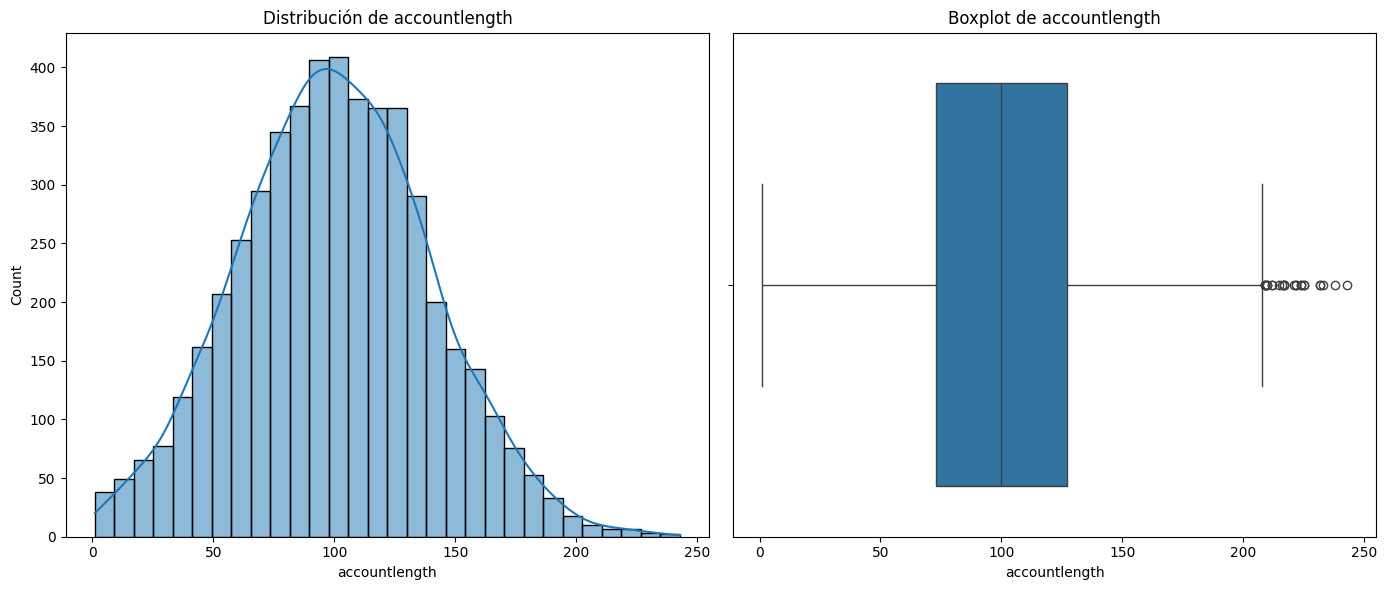

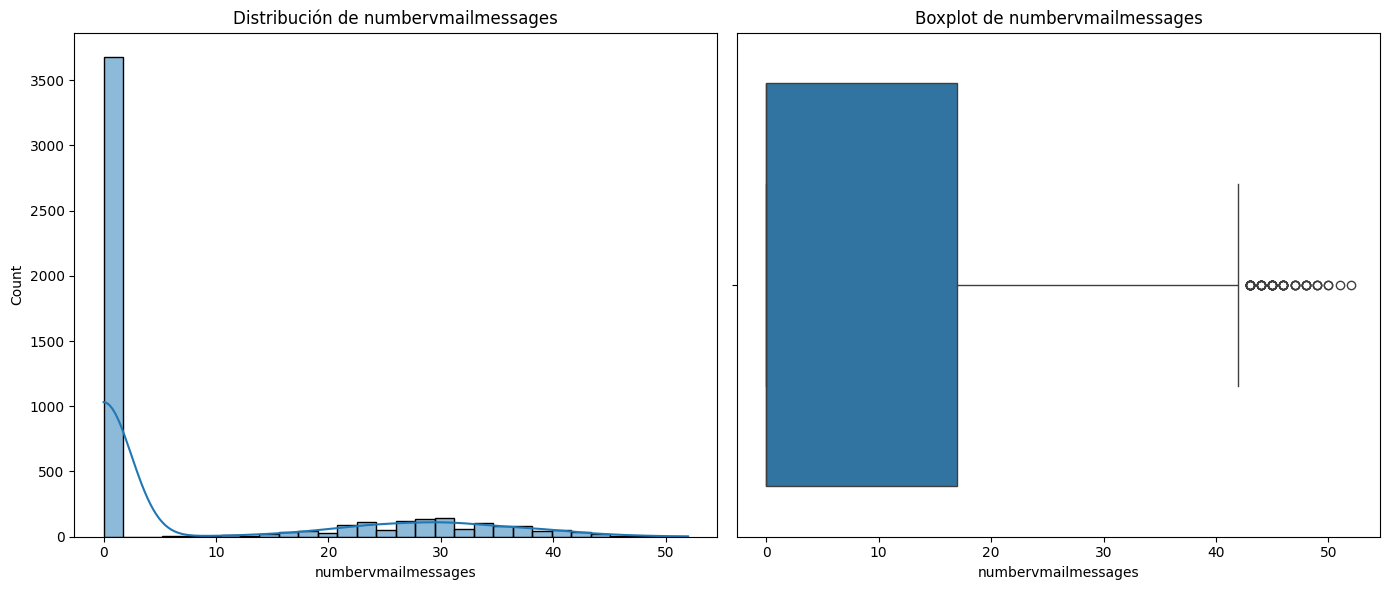

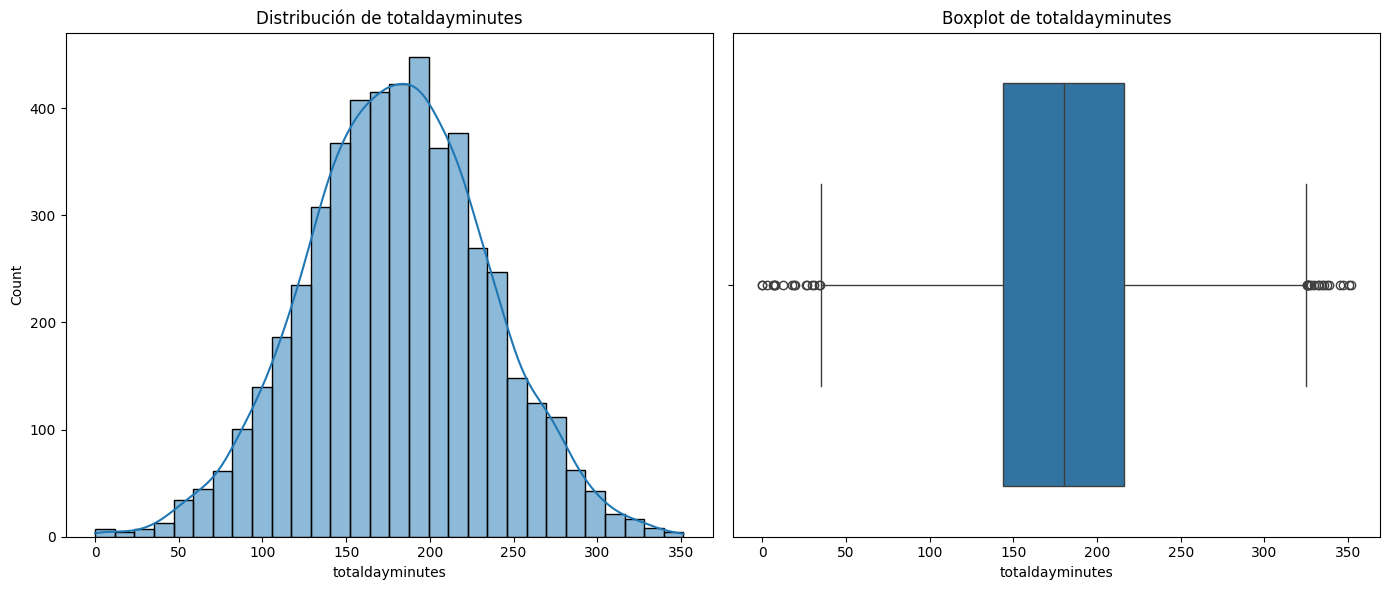

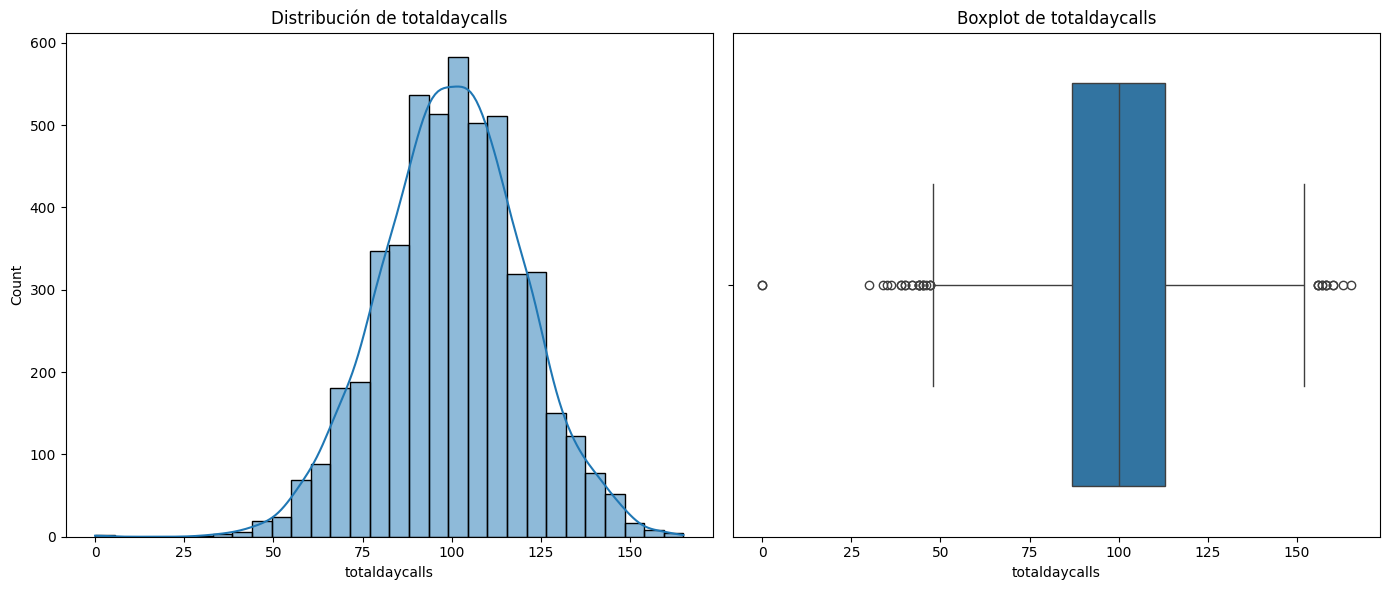

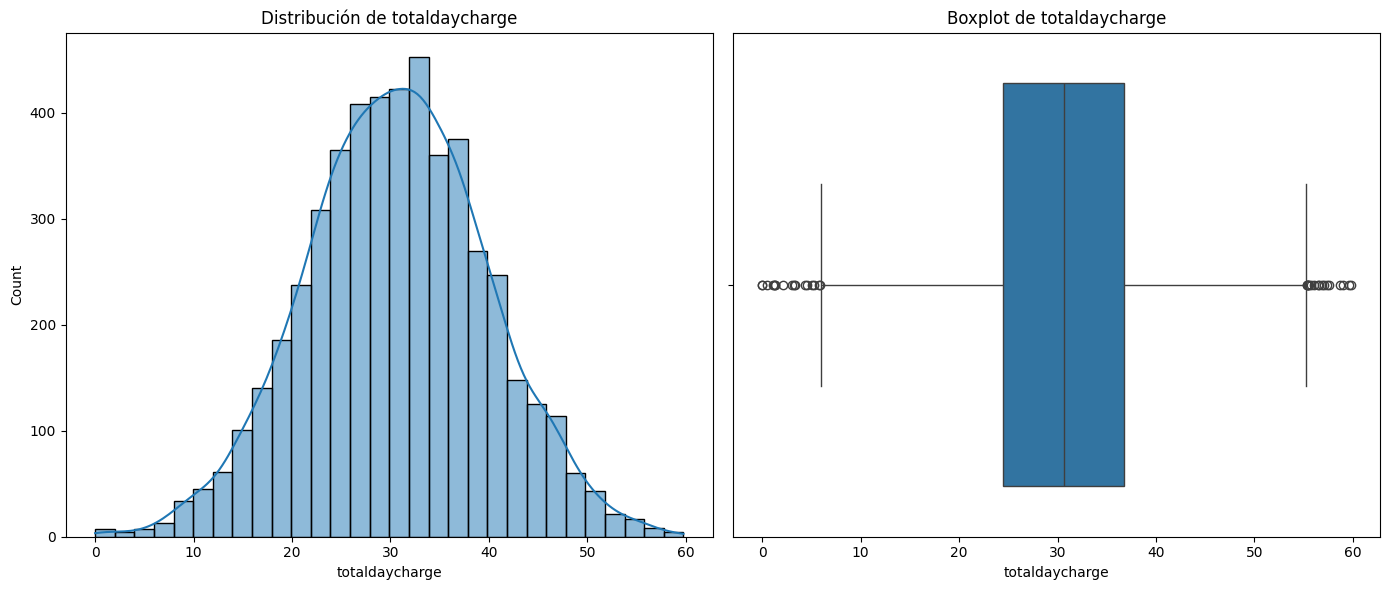

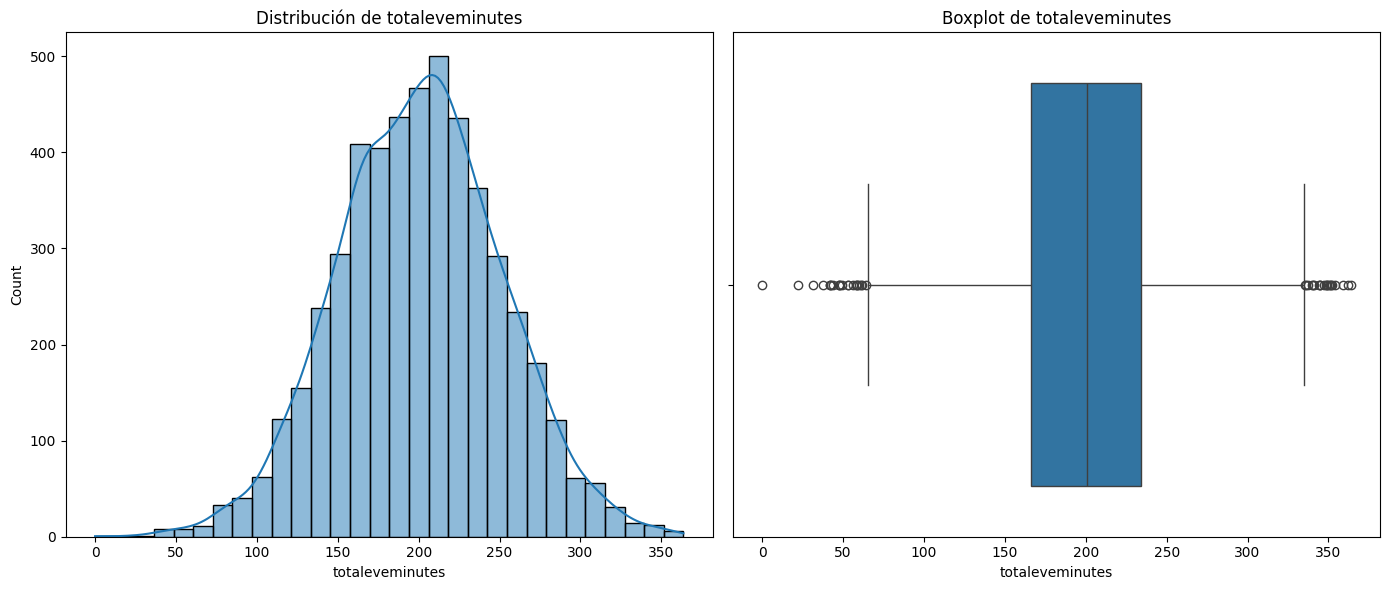

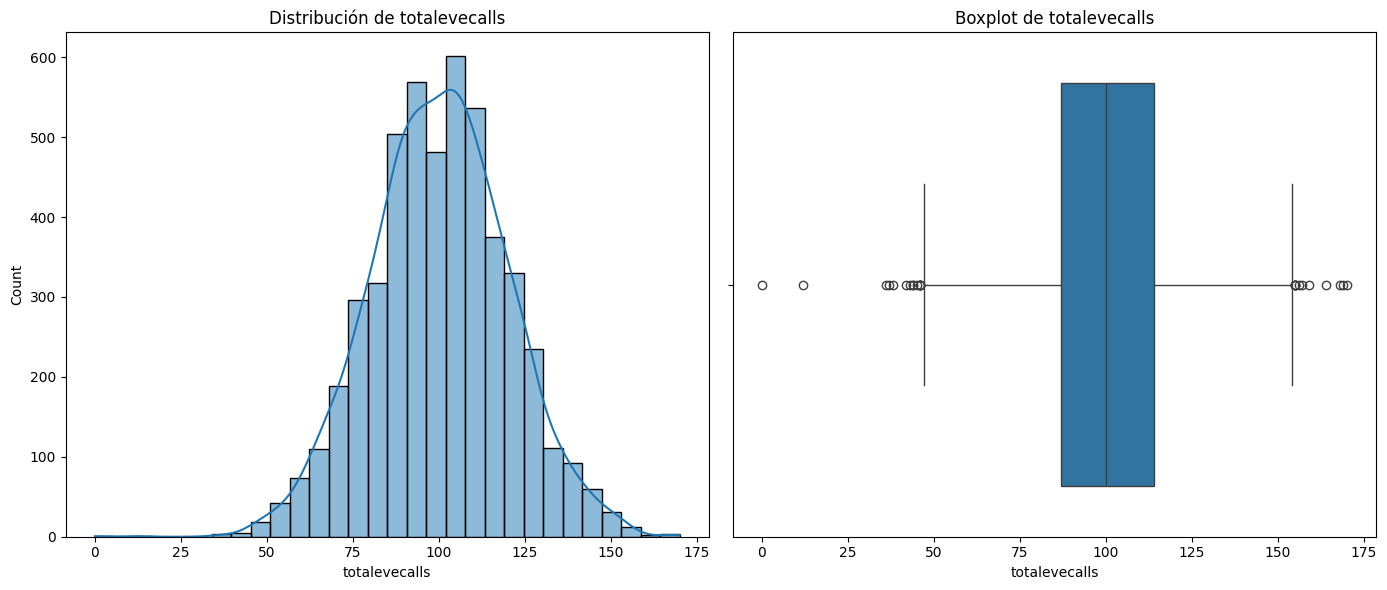

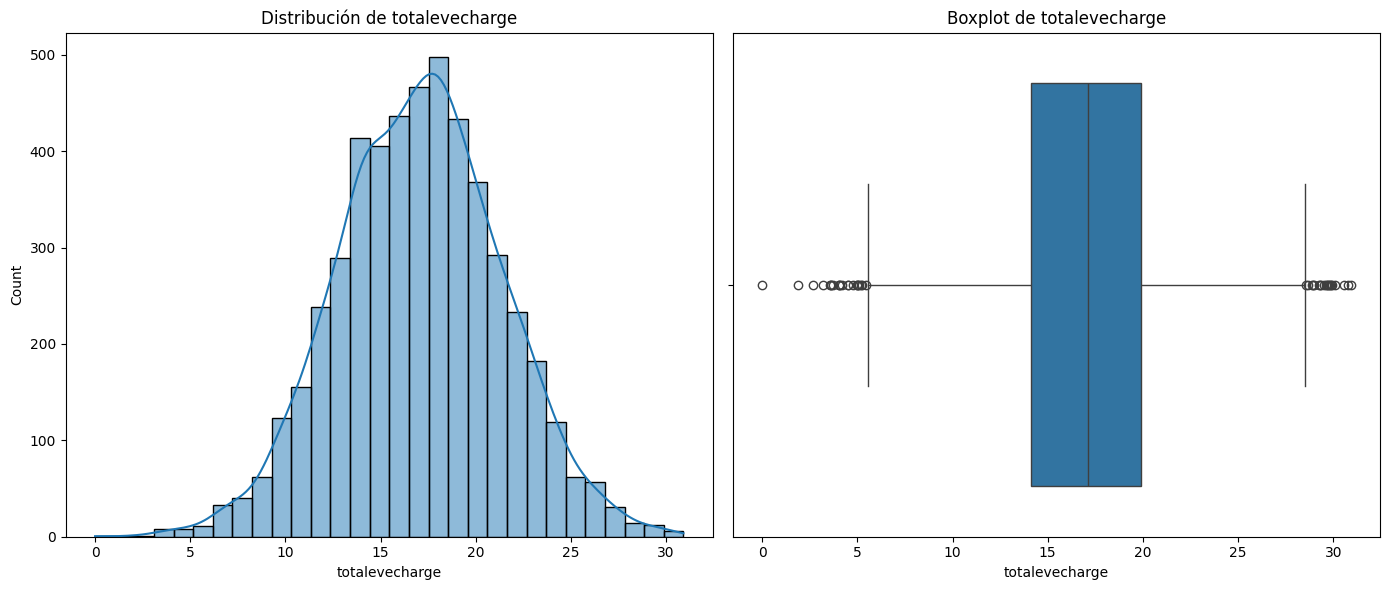

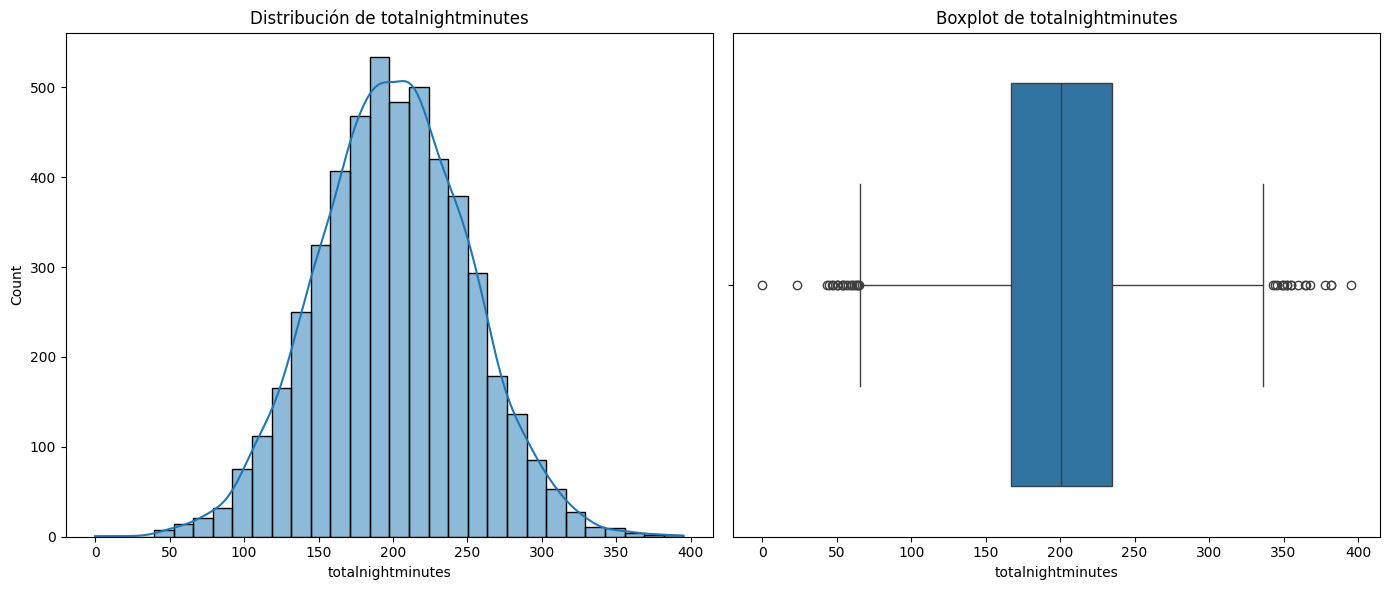

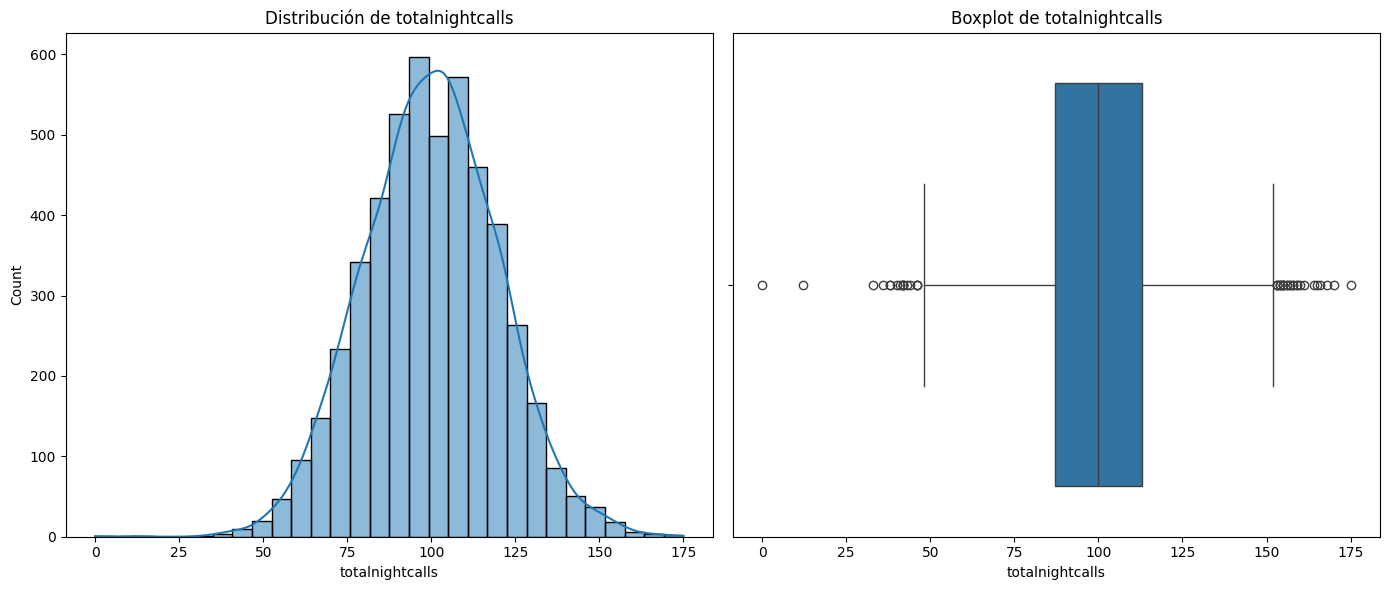

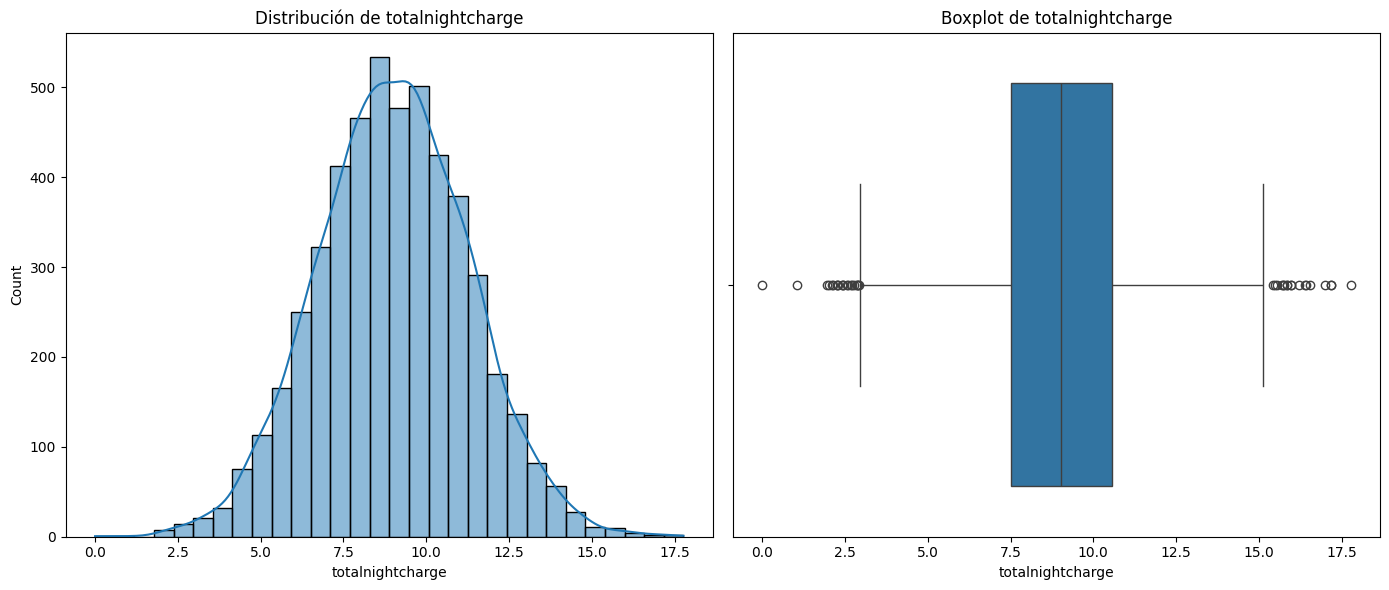

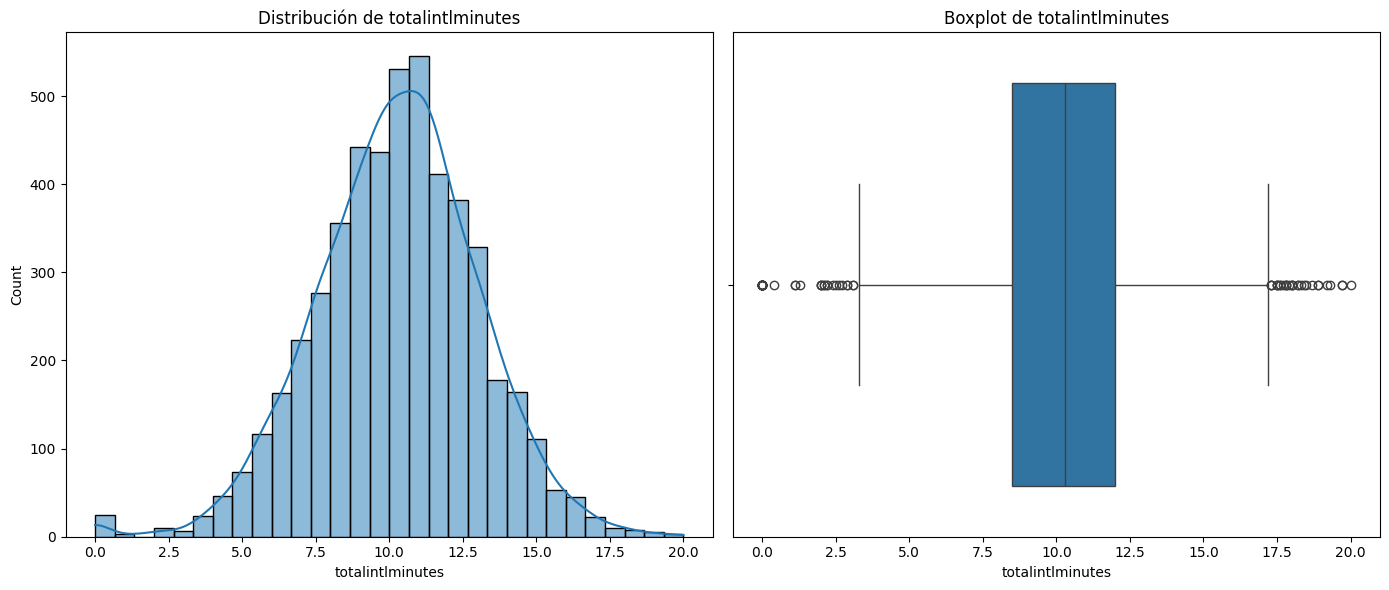

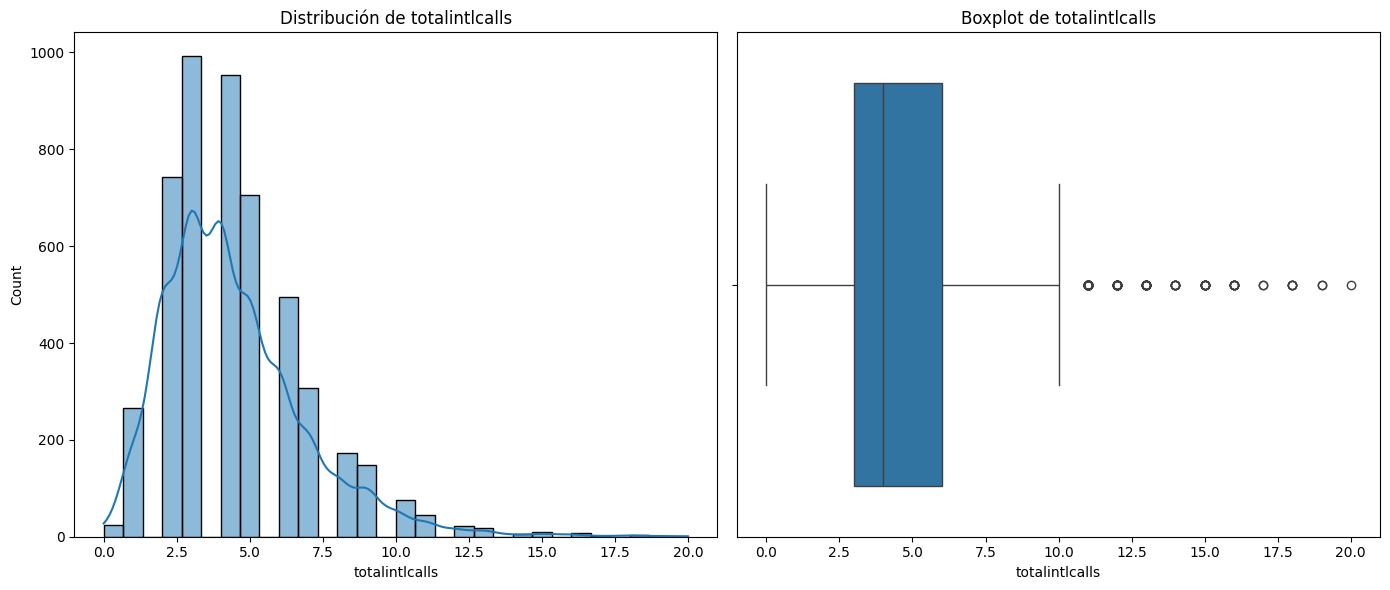

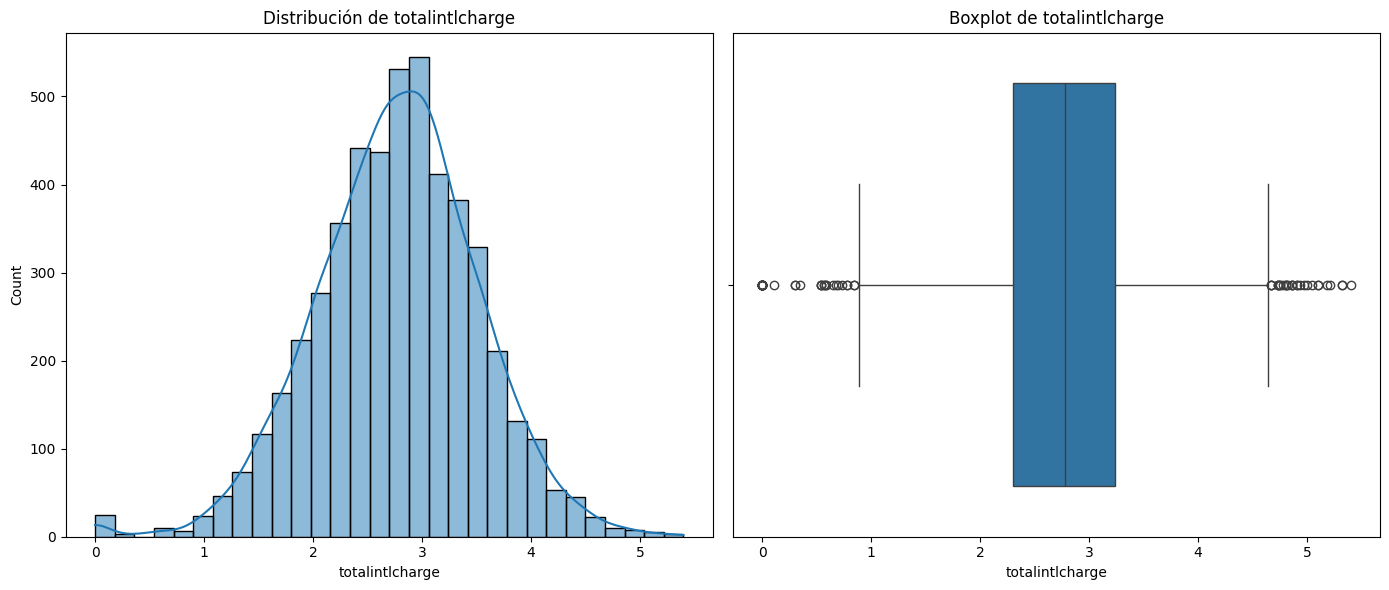

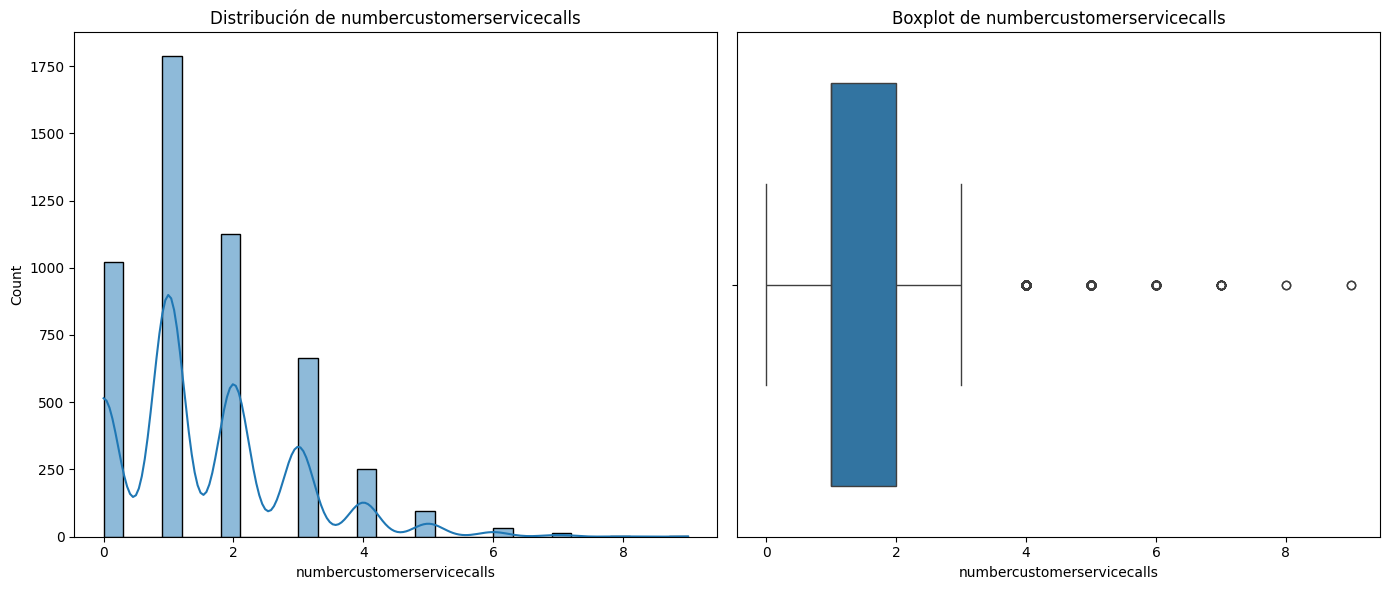

In [18]:
# Histograma y distribución de datos
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    plt.figure(figsize=(14, 6))

    # Histograma con KDE
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribución de {col}")

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot de {col}")

    plt.tight_layout()
    plt.show()

In [ ]:
# Comprobación de asimetría y normalidad
for col in num_cols:
    skewness = skew(df[col])
    kurt = kurtosis(df[col])
    print(f"{col}:")
    print(f"  Asimetría (Skewness): {skewness:.2f}")
    print(f"  Curtosis: {kurt:.2f}")

# Nueva sección